<a href="https://colab.research.google.com/github/pq2312/Predicting-Wine-Quality-A-Machine-Learning-Approach/blob/main/Predicting_Wine_Quality_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Predicting Wine Quality - A Machine Learning Approach**

*Dataset: Wine Quality dataset available at: https://archive.ics.uci.edu/ml/datasets/wine+quality*




**A. Data Tidying and Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

In [ ]:
#load dataset
table1  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
table2  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

In [ ]:
table1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
table2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#check missing info
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There is no missing value in both datasets.

In [ ]:
#Define "high_quality"
table1.loc[table1['quality'] >= 7, 'high_quality'] = 'True'
table1.loc[table1['quality'] < 7, 'high_quality'] = 'False'
table1 = table1.drop(["quality"], axis=1)
table1.head(3) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False


In [ ]:
table2.loc[table2['quality'] >= 7, 'high_quality'] = 'True'
table2.loc[table2['quality'] < 7, 'high_quality'] = 'False'
table2.head(3) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False


**B. Exploratory Data Analysis**


*Note: The below will deal with the 1st dataset (i.e. red wine) only.*

In [ ]:
table1[table1['high_quality'] == 'True'].shape[0] / table1.shape[0]

0.1357098186366479

In [ ]:
table1[table1['high_quality'] == 'False'].shape[0] / table1.shape[0]

0.8642901813633521

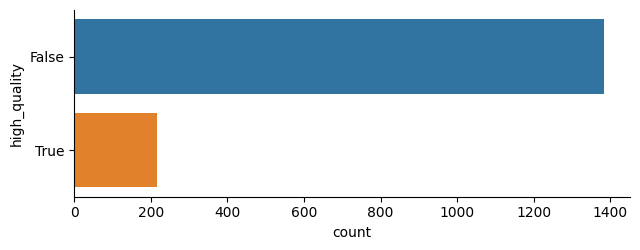

In [ ]:
ax = sns.catplot(y="high_quality", kind="count", data=table1, height=2.6, aspect=2.5)

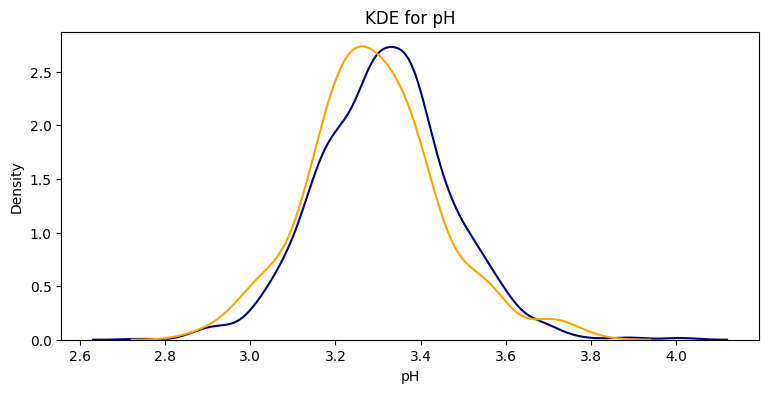

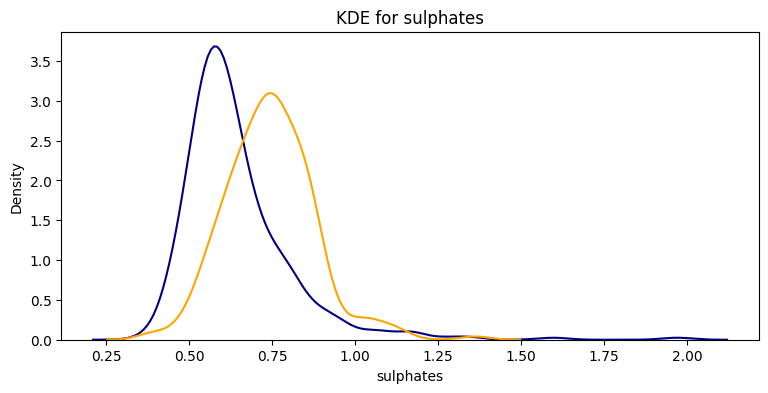

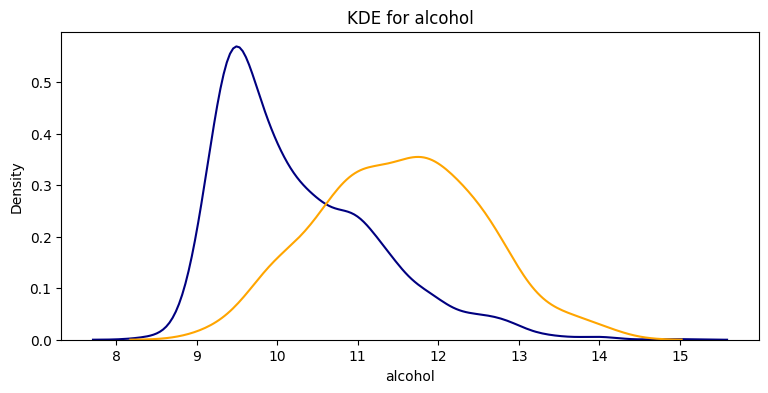

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(table1[table1['high_quality'] == 'False'][feature].dropna(), color= 'navy', label= 'high_quality: False')
    ax1 = sns.kdeplot(table1[table1['high_quality'] == 'True'][feature].dropna(), color= 'orange', label= 'high_quality: True')
kdeplot('pH')
kdeplot('sulphates')
kdeplot('alcohol')

From the plots above we can conclude that:


*   high alcohol level, high quality
*   high sulphates, high quality
*   no difference in terms of pH






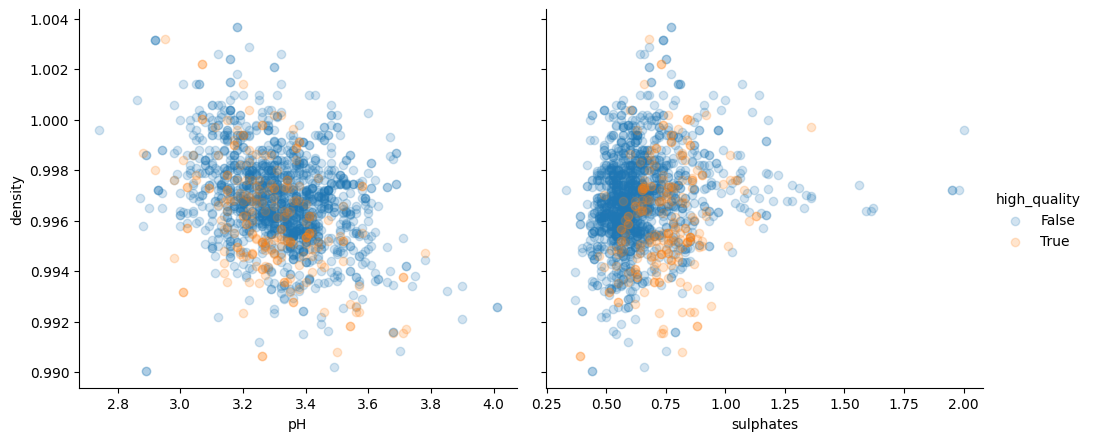

In [ ]:
g = sns.PairGrid(table1, y_vars=["density"], x_vars=["pH", "sulphates"], height=4.5, hue="high_quality", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.2)
g.add_legend();

**Correlation between features**

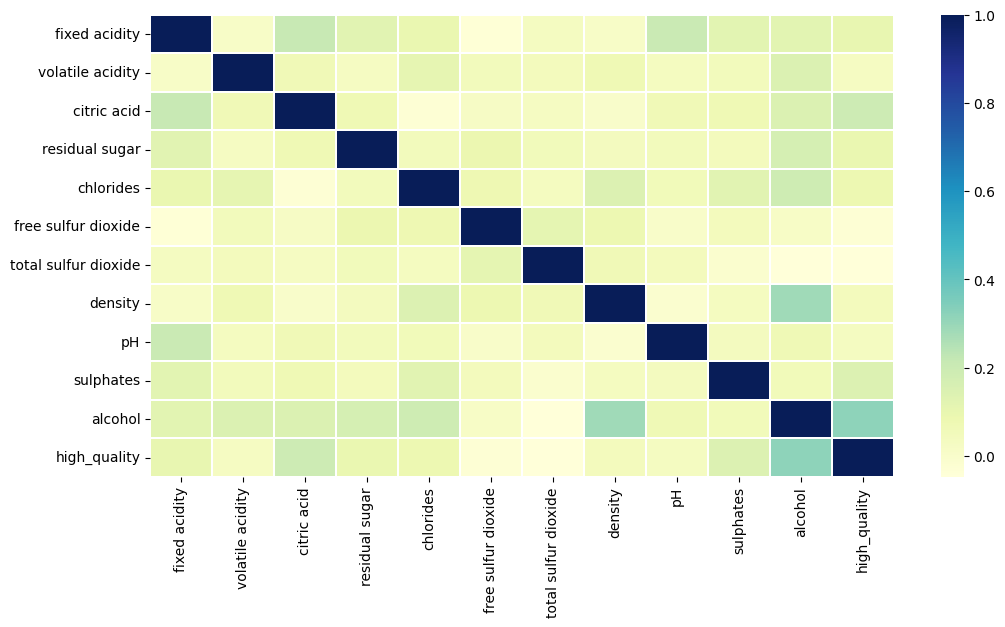

In [ ]:
plt.figure(figsize=(12, 6))
corr = table1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

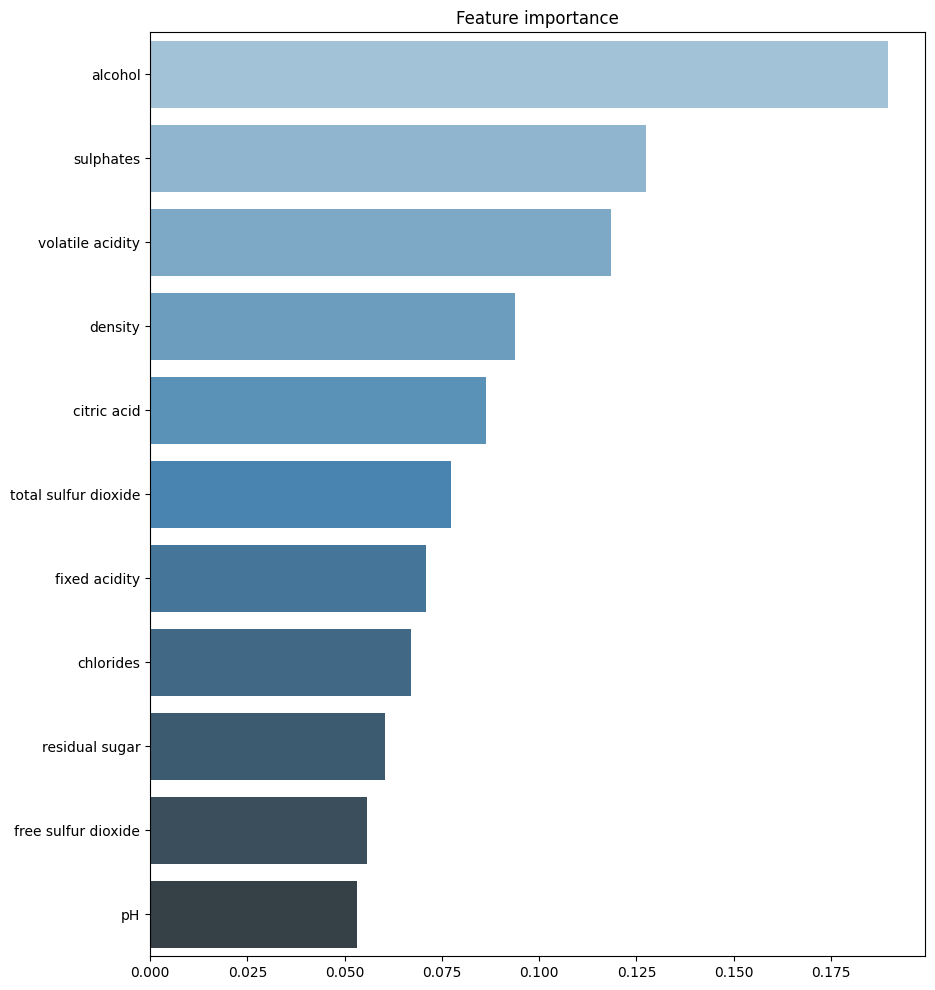

In [ ]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
red = pd.get_dummies(table1)

# Drop redundant columns (for features with two unique values)
drop = ['high_quality_True', 'high_quality_False']
x, y = red.drop(drop,axis=1), red['high_quality_True']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

**C. Feature Selection and Data Splitting**
 

*   Based on the above EDA findings, select a subset of features that are most relevant for predicting wine quality: Alcohol, Sulphates and Volatile acidity
*   Split the dataset into training (80%) and testing (20%) sets using the selected features and the target variable.




In [ ]:
 table1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


In [ ]:
table1.loc[table1['high_quality'] == 'True', 'high_quality'] = '1'
table1.loc[table1['high_quality'] == 'False', 'high_quality'] = '0'
X = table1[["alcohol", "sulphates", "volatile acidity"]].values
y = table1["high_quality"].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
 reg_all = LinearRegression()
 reg_all.fit(X_train, y_train)
 y_pred = reg_all.predict(X_test)
 


In [ ]:
reg_all.score(X_test, y_test)

0.2339122966681384

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.30982718408581594

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)
 

[0.22885494 0.19889918 0.22103034 0.17821007 0.22673157 0.22391083]


In [ ]:
print(np.mean(cv_results), np.std(cv_results))

0.21293948675332422 0.018405697049423544


In [ ]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.18079621 0.22858952]
